# **Turma de Pós-Graduação de Ciência de Dados**

**Disciplina: Aplicações de Finanças**

**prof: Sérgio Assunção Monteiro, DSc**

**Abordagem Aprendizado de Máquina**

# **Aula 01 - Parte 2**

In [ ]:
# Instalando o yahoo finance
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
!pip install requests 

In [ ]:
pip install --upgrade pandas

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf #Instalando e importando a API no código
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
dados_series = yf.download("PETR4.SA", start="2018-01-01", end="2022-01-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
with pd.option_context('display.max_rows',10):
  print(dados_series)

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2018-01-02  16.190001  16.549999  16.190001  16.549999  12.479182  33461800
2018-01-03  16.490000  16.719999  16.370001  16.700001  12.592283  55940900
2018-01-04  16.780001  16.959999  16.620001  16.730000  12.614908  37064900
2018-01-05  16.700001  16.860001  16.570000  16.830000  12.690310  26958200
2018-01-08  16.740000  17.030001  16.709999  17.030001  12.841118  28400000
...               ...        ...        ...        ...        ...       ...
2021-12-23  28.330000  28.420000  28.150000  28.330000  28.330000  28713600
2021-12-27  28.320000  28.780001  28.150000  28.750000  28.750000  44227900
2021-12-28  29.010000  29.280001  28.700001  28.780001  28.780001  30688100
2021-12-29  28.700001  28.900000  28.420000  28.540001  28.540001  35508400
2021-12-30  28.549999  28.700001  28.389999  28.450001  28.450001  43229100

[989 rows x

In [ ]:
#Selecionar apenas os dados referentes ao preço de fechamento
df = dados_series.drop(['Open','High', 'Low', 'Adj Close', 'Volume'], axis=1) 

In [ ]:
y=[]
for a in df['Close']:
  y.append(a)

In [ ]:
x = np.arange (1,len(y)+1,1)

In [ ]:
#print('x:{}'.format(x))
print('y:{}'.format(y))

y:[16.549999237060547, 16.700000762939453, 16.729999542236328, 16.829999923706055, 17.030000686645508, 17.030000686645508, 16.799999237060547, 17.25, 17.299999237060547, 17.350000381469727, 17.649999618530273, 18.360000610351562, 18.219999313354492, 18.260000228881836, 18.469999313354492, 18.239999771118164, 19.34000015258789, 19.34000015258789, 19.93000030517578, 19.850000381469727, 19.489999771118164, 19.700000762939453, 20.520000457763672, 19.969999313354492, 19.040000915527344, 19.989999771118164, 19.440000534057617, 19.049999237060547, 18.770000457763672, 19.25, 19.399999618530273, 19.420000076293945, 20.049999237060547, 20.440000534057617, 20.25, 20.739999771118164, 21.1200008392334, 21.520000457763672, 21.5, 21.459999084472656, 21.030000686645508, 21.510000228881836, 22.1200008392334, 21.899999618530273, 21.670000076293945, 21.700000762939453, 22.389999389648438, 22.329999923706055, 22.110000610351562, 22.3799991607666, 21.309999465942383, 21.43000030517578, 20.93000030517578, 2

In [ ]:
minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)
print(y)

[0.26525462 0.27281899 0.27433179 0.27937467 0.28946044 0.28946044
 0.27786178 0.3005547  0.3030761  0.30559759 0.32072614 0.35653053
 0.34947045 0.35148764 0.36207761 0.35047905 0.40595057 0.40595057
 0.43570348 0.43166919 0.41351485 0.42410491 0.46545638 0.43772057
 0.39082202 0.43872917 0.41099345 0.39132622 0.37720626 0.40141199
 0.40897626 0.40998486 0.44175486 0.4614221  0.45184063 0.47655065
 0.49571359 0.51588502 0.51487643 0.51285924 0.491175   0.51538073
 0.54614223 0.53504787 0.5234493  0.5249622  0.55975789 0.5567322
 0.54563793 0.55925359 0.50529496 0.51134644 0.48613212 0.49773068
 0.54261214 0.5259707  0.52748359 0.54160364 0.51185074 0.49974788
 0.51033784 0.48461922 0.47503776 0.45839631 0.49722639 0.50378216
 0.46596068 0.50983355 0.53000498 0.5239536  0.49974788 0.47049927
 0.491175   0.53000498 0.55017652 0.55824509 0.56429647 0.56026219
 0.52647499 0.57186075 0.57589504 0.5890065  0.57034795 0.56278368
 0.55370651 0.57286935 0.58598081 0.68028241 0.72919815 0.71356

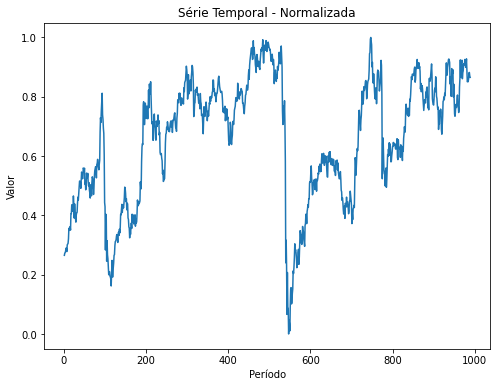

In [ ]:
import matplotlib.pyplot as plt
plt.title('Série Temporal - Normalizada')
plt.xlabel('Período')
plt.ylabel('Valor')
plt.plot(x,y)
plt.show()

In [ ]:
percentual_treinamento = 0.8
qtd_treinamento = int(percentual_treinamento*(len(x)));

x_treino = x[0:qtd_treinamento] 
x_teste = x[qtd_treinamento:]

y_treino = y[0:qtd_treinamento]
y_teste = y[qtd_treinamento:]

treino = np.array(list(zip(x_treino, y_treino)))
teste = np.array(list(zip(x_teste, y_teste)))
for i in range(5):
  print('treino[{}]: {}'.format(i+1, treino[i]))

treino[1]: [1.         0.26525462]
treino[2]: [2.         0.27281899]
treino[3]: [3.         0.27433179]
treino[4]: [4.         0.27937467]
treino[5]: [5.         0.28946044]


In [ ]:
def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

In [ ]:
def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

In [ ]:
look_back = 2
x_treino, y_treino = preparar_dados(treino, look_back)
x_teste, y_teste = preparar_dados(teste, look_back)

n_caracteristicas = 1 #série monovariada
x_treino = x_treino.reshape((x_treino.shape[0], 
                             x_treino.shape[1], 
                             n_caracteristicas))
x_teste = x_teste.reshape((x_teste.shape[0], 
                       x_teste.shape[1], 
                       n_caracteristicas))

#print('ax: {}'.format(trainx))
#print('y: {}'.format(y))
for i in range(5):
  print('treino[{}]: {} -> {}'.format(i+1, x_treino[i], y_treino[i]))


treino[1]: [[0.26525462]
 [0.27281899]] -> 0.27433178717549045
treino[2]: [[0.27281899]
 [0.27433179]] -> 0.2793746705363175
treino[3]: [[0.27433179]
 [0.27937467]] -> 0.28946043725797155
treino[4]: [[0.27937467]
 [0.28946044]] -> 0.28946043725797155
treino[5]: [[0.28946044]
 [0.28946044]] -> 0.2778617766725695


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
n_etapas = x_treino.shape[1]
n_caracteristicas = x_treino.shape[2]
epocas = 20
n_unidades = 100
tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
modelo = Sequential()
camada_de_entrada=(n_etapas, n_caracteristicas)
modelo.add(LSTM(n_unidades, 
               return_sequences = True, 
               input_shape = camada_de_entrada))
modelo.add(Dropout(0.2))
modelo.add(LSTM(128,
               input_shape = camada_de_entrada))
modelo.add(Dense(1))


In [ ]:
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 100)            40800     
                                                                 
 dropout_2 (Dropout)         (None, 2, 100)            0         
                                                                 
 lstm_5 (LSTM)               (None, 128)               117248    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 158,177
Trainable params: 158,177
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo.compile(loss = 'mean_squared_error', 
              optimizer = 'adam')



In [ ]:
historico = modelo.fit(x_treino, y_treino,
                       epochs = epocas,
                       batch_size = 70,
                       verbose = 2,
                       shuffle = False,
                       validation_split = 0.3)


Epoch 1/20
8/8 - 4s - loss: 0.3715 - val_loss: 0.1973 - 4s/epoch - 558ms/step
Epoch 2/20
8/8 - 0s - loss: 0.1663 - val_loss: 0.0431 - 97ms/epoch - 12ms/step
Epoch 3/20
8/8 - 0s - loss: 0.0129 - val_loss: 0.0356 - 106ms/epoch - 13ms/step
Epoch 4/20
8/8 - 0s - loss: 0.0366 - val_loss: 0.0210 - 106ms/epoch - 13ms/step
Epoch 5/20
8/8 - 0s - loss: 0.0182 - val_loss: 0.0087 - 101ms/epoch - 13ms/step
Epoch 6/20
8/8 - 0s - loss: 0.0150 - val_loss: 0.0075 - 96ms/epoch - 12ms/step
Epoch 7/20
8/8 - 0s - loss: 0.0081 - val_loss: 0.0110 - 143ms/epoch - 18ms/step
Epoch 8/20
8/8 - 0s - loss: 0.0099 - val_loss: 0.0091 - 101ms/epoch - 13ms/step
Epoch 9/20
8/8 - 0s - loss: 0.0091 - val_loss: 0.0061 - 103ms/epoch - 13ms/step
Epoch 10/20
8/8 - 0s - loss: 0.0074 - val_loss: 0.0059 - 99ms/epoch - 12ms/step
Epoch 11/20
8/8 - 0s - loss: 0.0065 - val_loss: 0.0058 - 108ms/epoch - 14ms/step
Epoch 12/20
8/8 - 0s - loss: 0.0064 - val_loss: 0.0047 - 101ms/epoch - 13ms/step
Epoch 13/20
8/8 - 0s - loss: 0.0057 - val_

In [ ]:
import pandas as pd
hist = pd.DataFrame(historico.history)
hist.head()

,loss,val_loss
0,0.371512,0.197307
1,0.166254,0.043114
2,0.012897,0.035587
3,0.036613,0.021027
4,0.018242,0.008742


In [ ]:
loss = modelo.evaluate(x_teste, y_teste, batch_size=64)
print("loss: {}".format(loss))

4/4 [==============================] - 0s 5ms/step - loss: 0.0012
loss: 0.001247147098183632


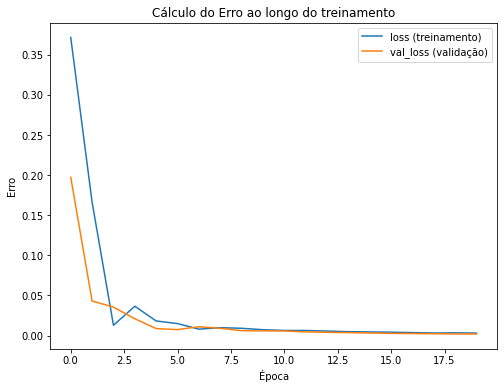

In [ ]:
plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()

In [ ]:
predicao = modelo.predict(x_teste)

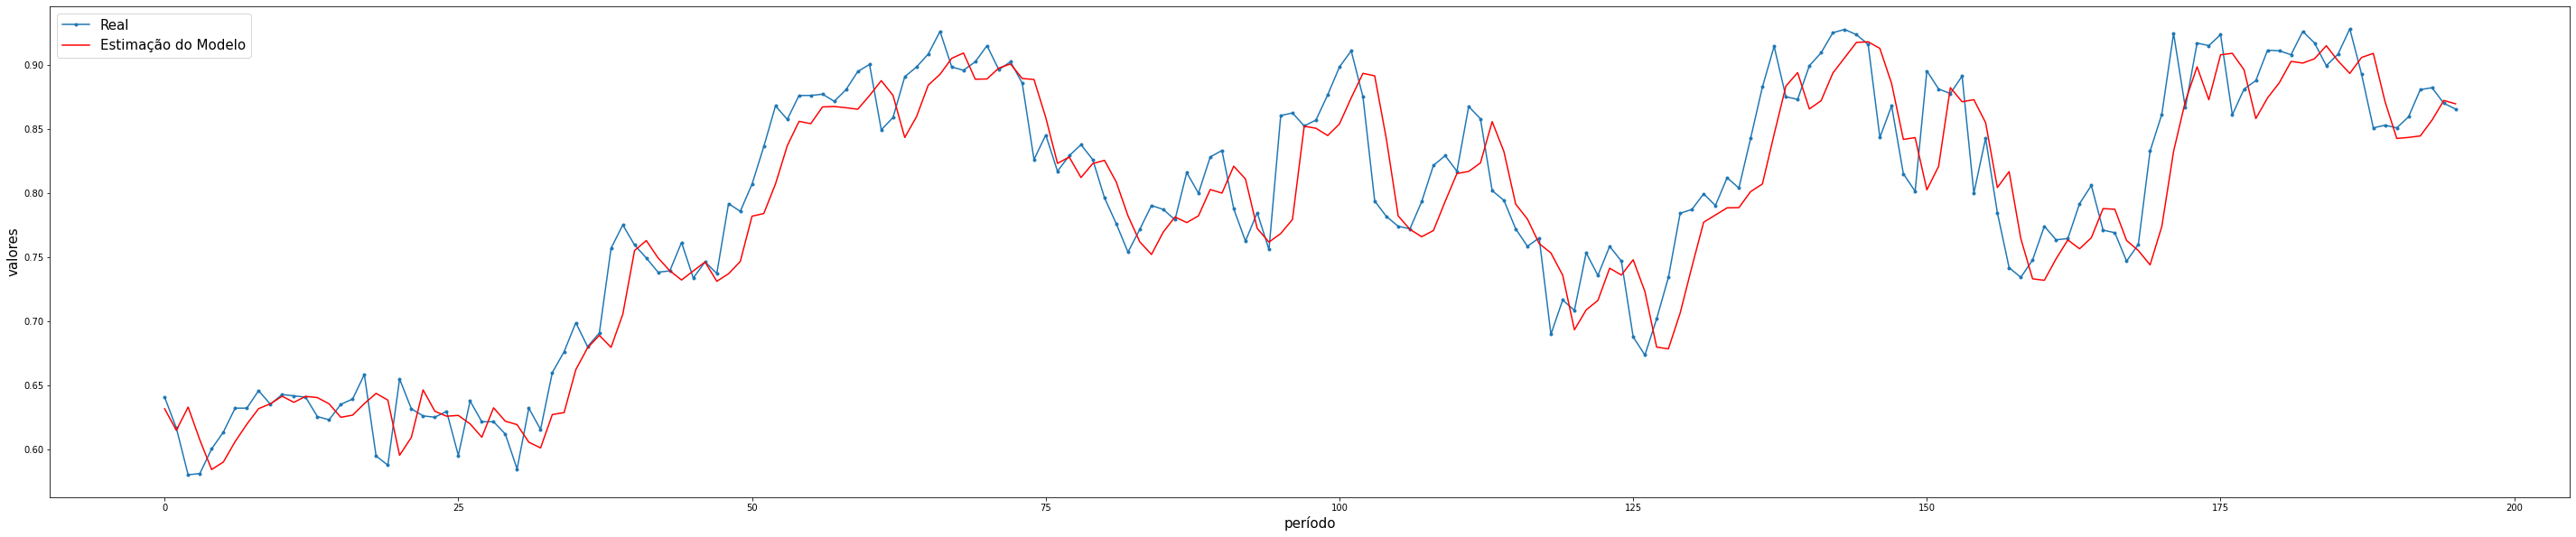

In [ ]:
escala = 1
valores_reais_y = y_teste*escala
plt.figure(figsize=(50,10))
plt.plot(list(range(len(valores_reais_y))), 
         valores_reais_y, 
         marker='.', 
         label="Real")
lst_dados_predicao=[w[0]*escala for w in predicao]
plt.plot(list(range(len(predicao))), 
         lst_dados_predicao, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

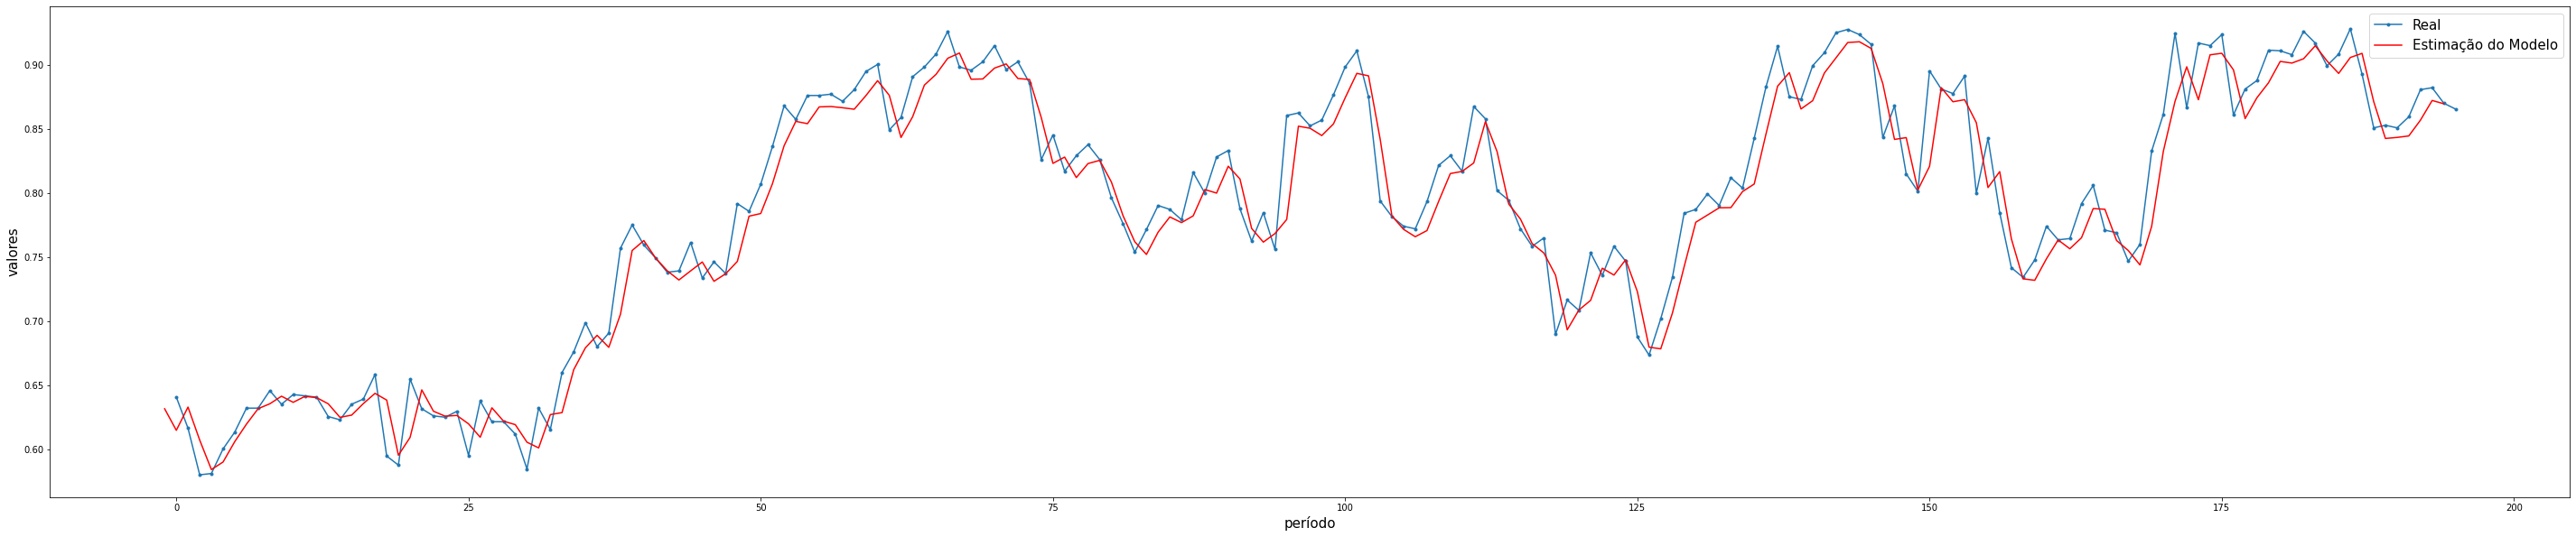

In [ ]:
look_back = 1
valores_reais_y = y_teste
plt.figure(figsize=(50,10))
plt.plot(list(range(len(valores_reais_y))), 
         valores_reais_y, 
         marker='.', 
         label="Real")
lst_dados_predicao=[w[0] for w in predicao]
plt.plot(list(np.arange(len(predicao))-look_back), 
         lst_dados_predicao, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()